In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("swatikhedekar/price-prediction-of-diamond")

print("Path to dataset files:", path)

100%|██████████| 733k/733k [00:00<00:00, 1.17MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/swatikhedekar/price-prediction-of-diamond/versions/3


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNet, BayesianRidge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
df = pd.read_csv("/root/.cache/kagglehub/datasets/swatikhedekar/price-prediction-of-diamond/versions/3/diamonds.csv")
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
df = df.drop(columns=['Unnamed: 0'], errors='ignore')
data = df.copy()
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [5]:
df.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


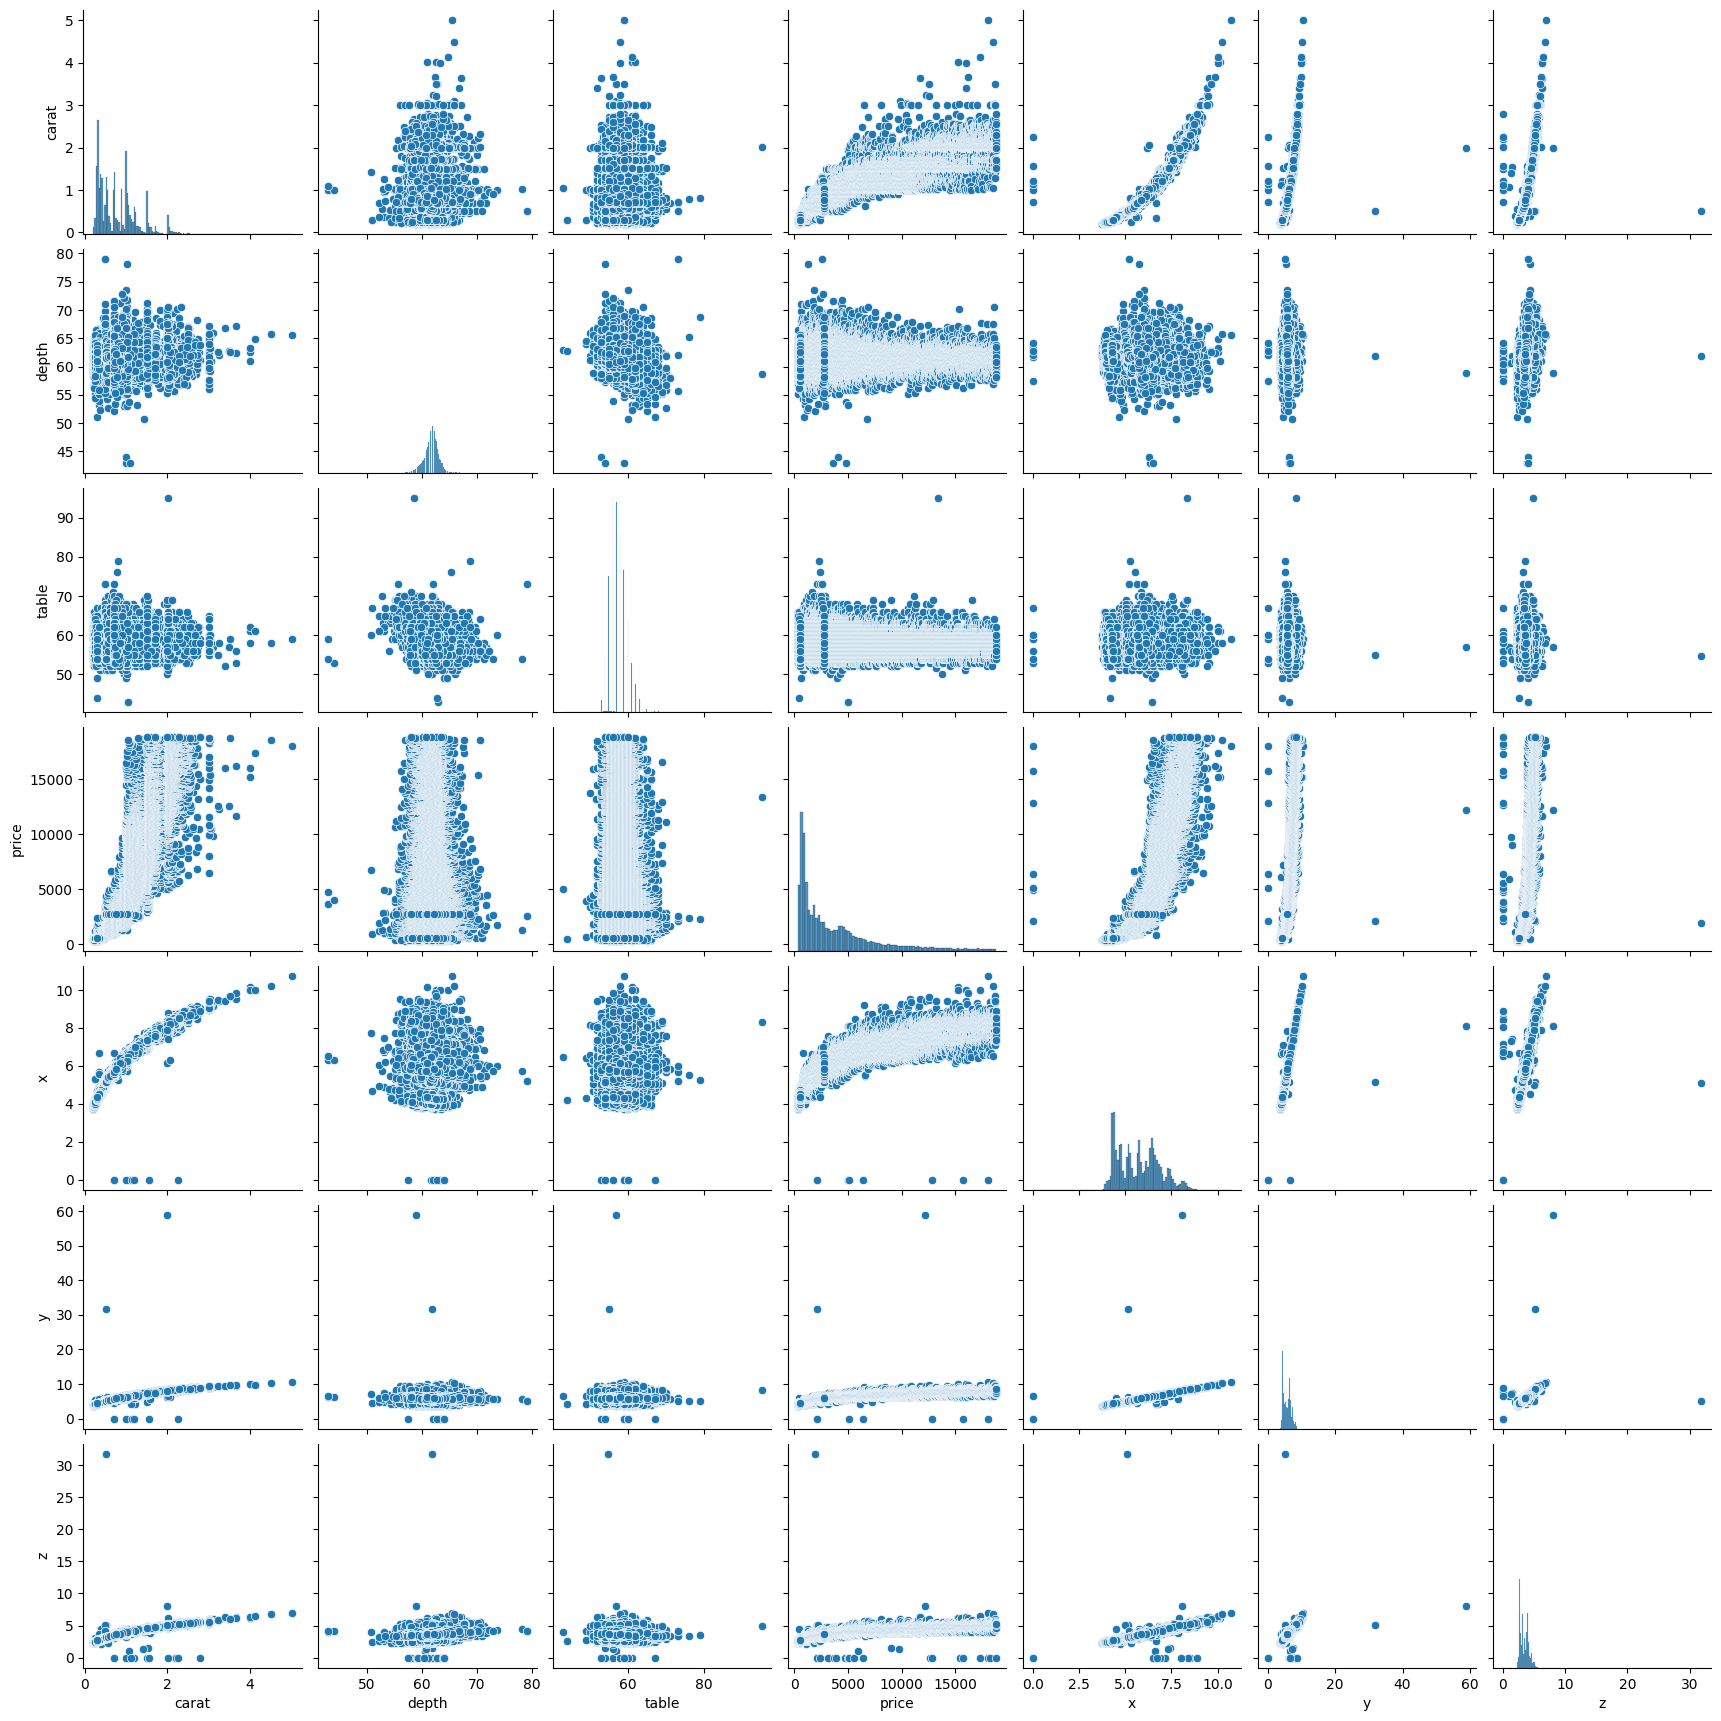

In [6]:
sns.pairplot(df)

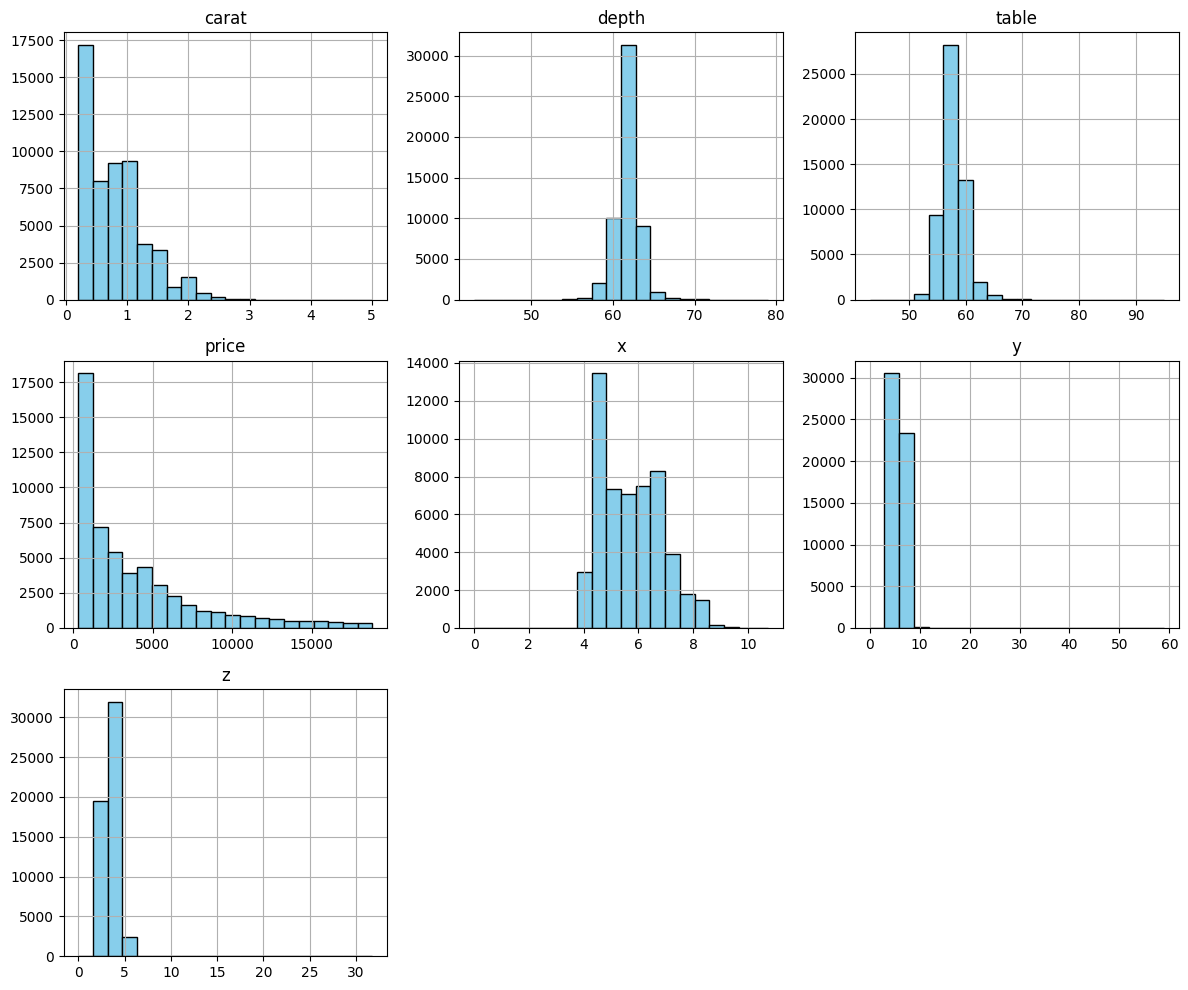

In [7]:
df.hist(figsize=(12, 10), bins=20, color="skyblue", edgecolor="black")
plt.tight_layout()
plt.show()

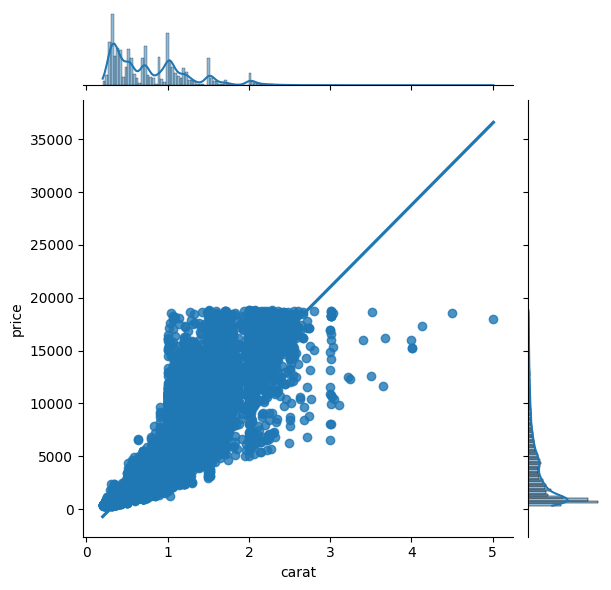

In [8]:
sns.jointplot(data=df, x='carat', y='price', kind="reg")
plt.show()

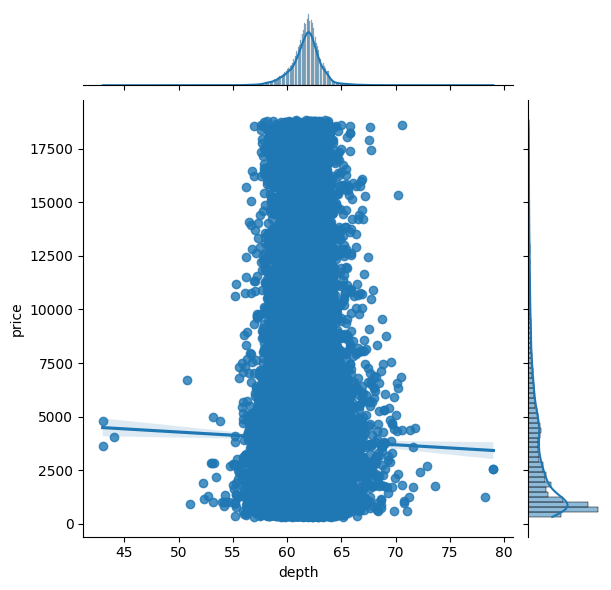

In [9]:
sns.jointplot(data=df, x='depth', y='price', kind="reg")
plt.show()

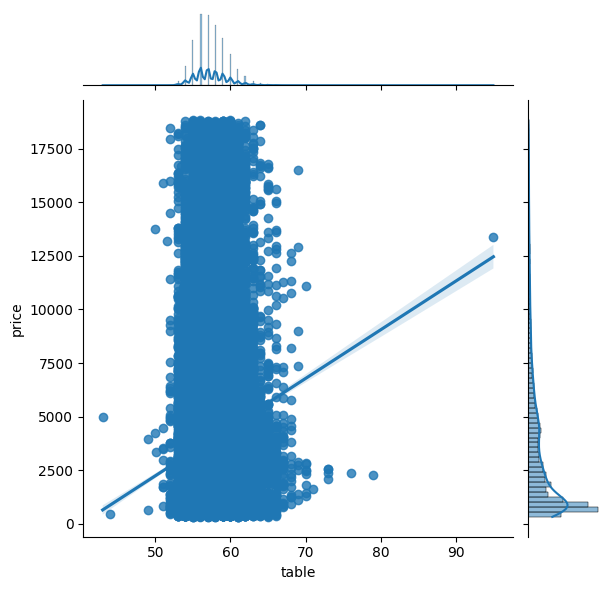

In [10]:
sns.jointplot(data=df, x='table', y='price', kind="reg")
plt.show()

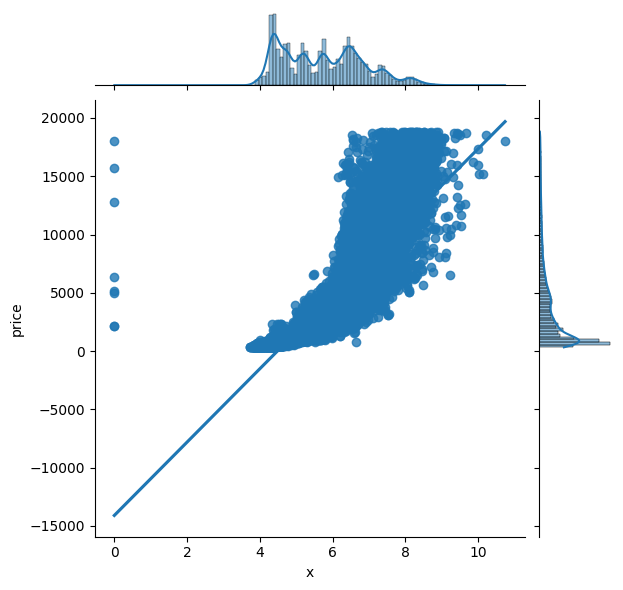

In [11]:
sns.jointplot(data=df, x='x', y='price', kind="reg")
plt.show()

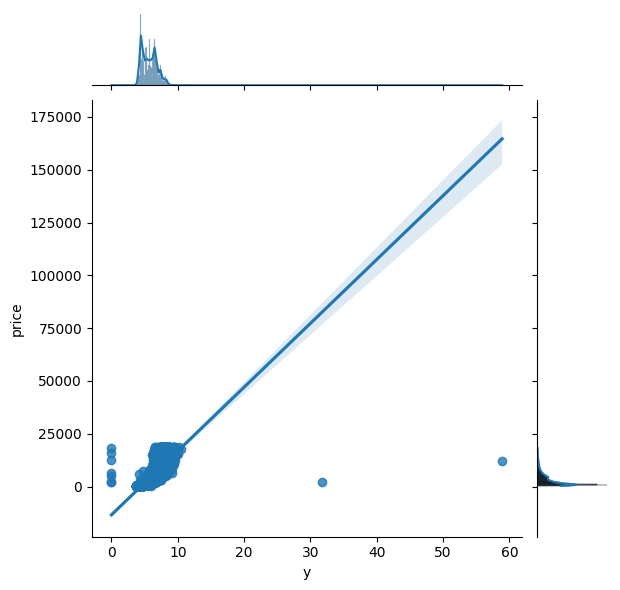

In [12]:
sns.jointplot(data=df, x='y', y='price', kind="reg")
plt.show()

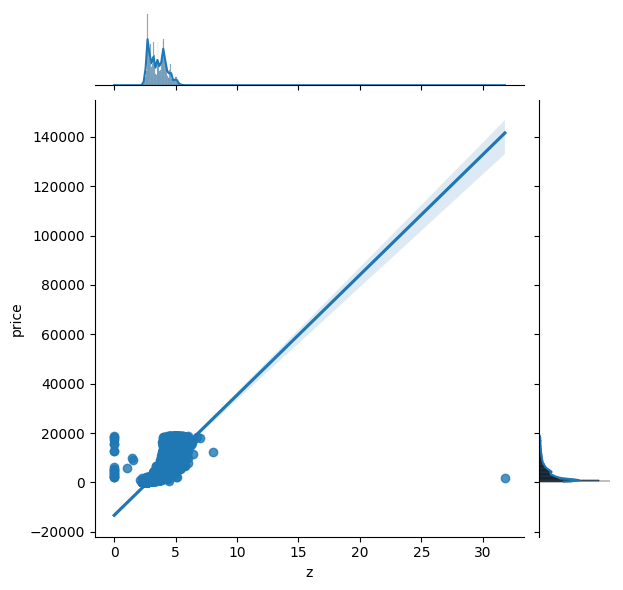

In [13]:
sns.jointplot(data=df, x='z', y='price', kind="reg")
plt.show()

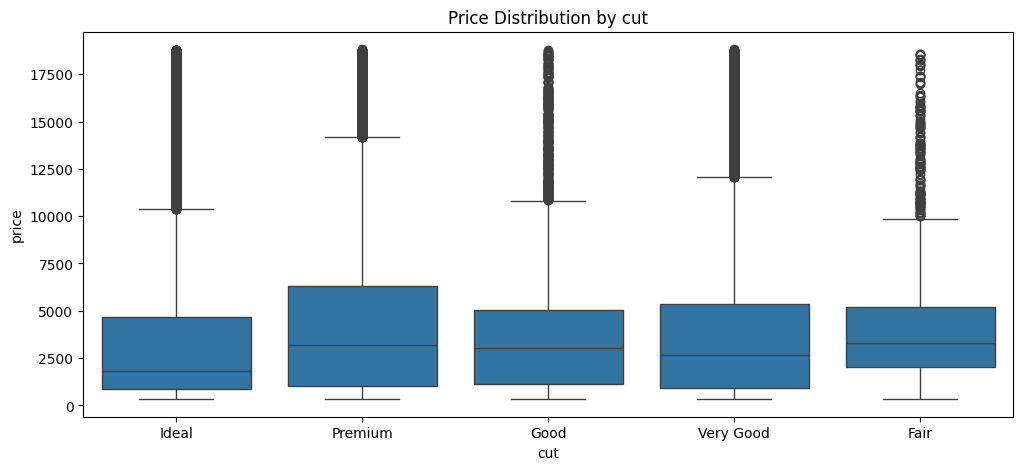

In [14]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='cut', y='price')
plt.title("Price Distribution by cut")
plt.show()

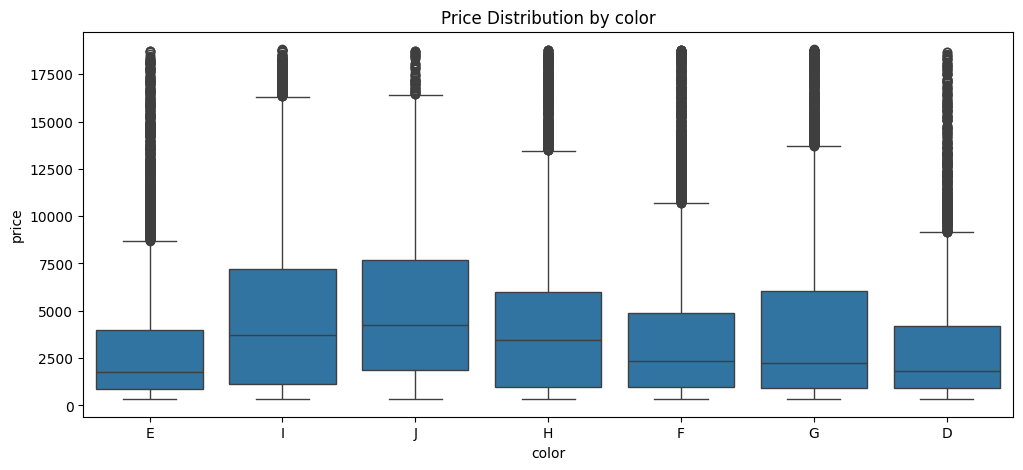

In [15]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='color', y='price')
plt.title("Price Distribution by color")
plt.show()

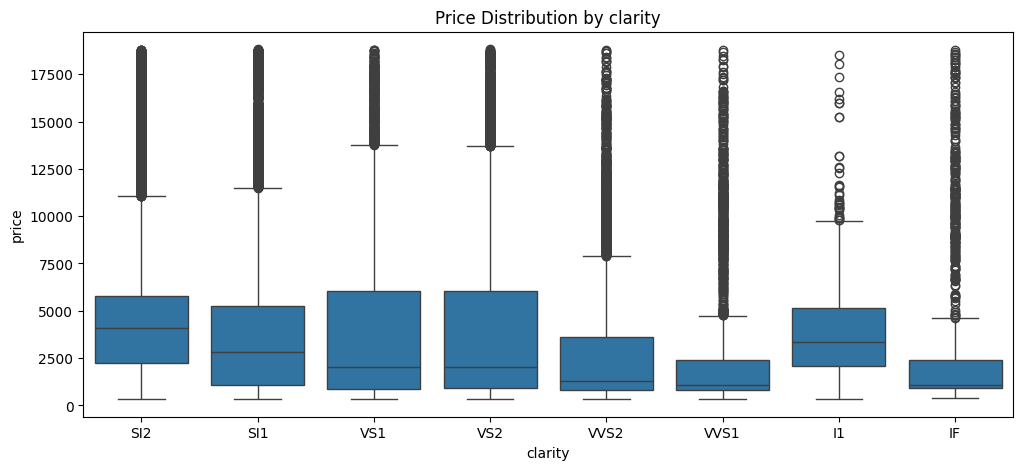

In [16]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='clarity', y='price')
plt.title("Price Distribution by clarity")
plt.show()

In [17]:
df['cut'].value_counts()

,count
cut,
Ideal,21551
Premium,13791
Very Good,12082
Good,4906
Fair,1610


In [19]:
df['color'].value_counts()

,count
color,
G,11292
E,9797
F,9542
H,8304
D,6775
I,5422
J,2808


In [18]:
df['clarity'].value_counts()

,count
clarity,
SI1,13065
VS2,12258
SI2,9194
VS1,8171
VVS2,5066
VVS1,3655
IF,1790
I1,741


In [20]:
# df[categorical] = df[categorical].apply(LabelEncoder().fit_transform)
categorical = ['cut', 'color', 'clarity']

cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
df['cut'] = OrdinalEncoder(categories=[cut_order]).fit_transform(df[['cut']])

df = pd.get_dummies(df, columns=['color', 'clarity'], drop_first=True)

df.head()

,carat,cut,depth,table,price,x,y,z,color_E,color_F,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,4.0,61.5,55.0,326,3.95,3.98,2.43,True,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,3.0,59.8,61.0,326,3.89,3.84,2.31,True,False,...,False,False,False,False,True,False,False,False,False,False
2,0.23,1.0,56.9,65.0,327,4.05,4.07,2.31,True,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,3.0,62.4,58.0,334,4.20,4.23,2.63,False,False,...,False,True,False,False,False,False,False,True,False,False
4,0.31,1.0,63.3,58.0,335,4.34,4.35,2.75,False,False,...,False,False,True,False,False,True,False,False,False,False


<Axes: >

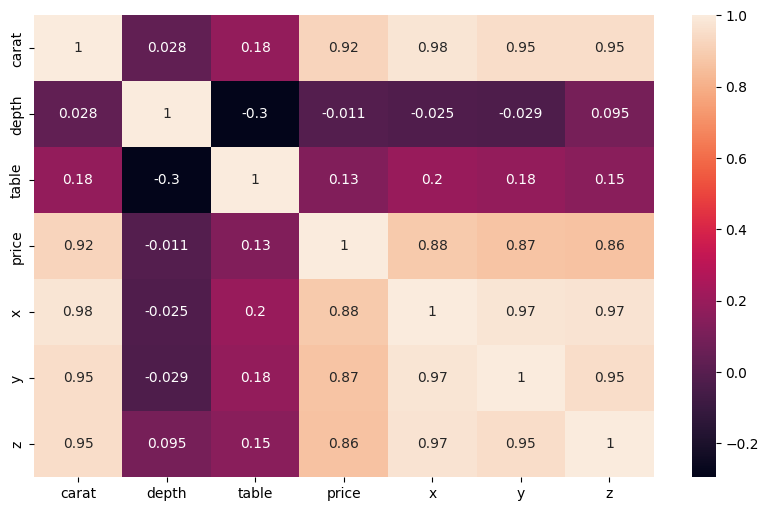

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.drop(columns=categorical).corr(), annot=True)

In [22]:
X = df.drop(columns=["price"])
y = df["price"]

In [23]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Коефициенти W:  [ 54356.33365715    429.09689674  -2852.24717998  -1415.51682901
 -11113.09655753    516.24146369   -956.9031229    -214.07633668
   -280.93309831   -495.78803925   -998.73967477  -1476.60130786
  -2368.30326556   5461.41818731   3786.73029713   2804.36753216
   4686.51770281   4371.01384734   5120.84291063   5063.90642502]
Пресек W0:  1246.4264944290117
Средна квадратна грешка: 1294185.8829451413
Средна апсолутна грешка: 737.5357909693189
Корен на средна квадратна грешка: 1137.622908940015
R-квадрат:  0.9185883865580818


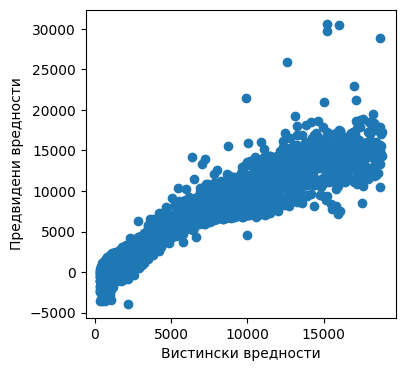

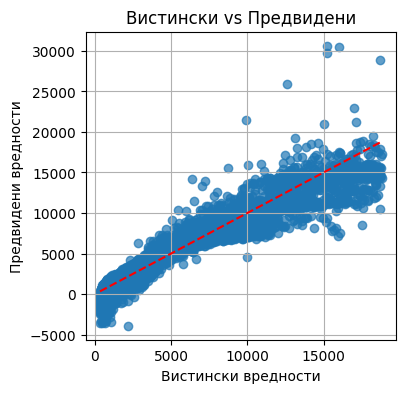

In [26]:
reg = LinearRegression().fit(X_train, y_train)
print("Коефициенти W: ", reg.coef_)
print("Пресек W0: ", reg.intercept_)

y_pred = reg.predict(X_test)
print("Средна квадратна грешка:", mean_squared_error(y_test, y_pred))
print("Средна апсолутна грешка:", mean_absolute_error(y_test, y_pred))
print("Корен на средна квадратна грешка:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-квадрат: ", r2_score(y_test,y_pred))

plt.figure(figsize=(4, 4))
plt.scatter(y_test,y_pred)
plt.xlabel("Вистински вредности")
plt.ylabel("Предвидени вредности")
plt.show()

plt.figure(figsize=(4, 4))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Вистински вредности")
plt.ylabel("Предвидени вредности")
plt.title("Вистински vs Предвидени")
plt.grid(True)
plt.show()

Коефициенти W:  [ 54014.89311705    429.86645396  -2794.31818395  -1405.83385107
 -10751.03945445    354.2712087   -1045.22967297   -213.83893395
   -281.23909913   -495.71030617   -997.48982115  -1474.23497783
  -2364.97563393   5455.32221892   3777.79468419   2796.690099
   4678.26119802   4362.83610899   5114.82090917   5056.97093977]
Пресек W0:  1095.073531247856
Optimal alpha for RidgeCV: 0.1
Средна квадратна грешка: 1294090.1355883244
Средна апсолутна грешка: 738.4850240251603
Корен на средна квадратна грешка: 1137.5808259584567
R-квадрат:  0.9185944096084828


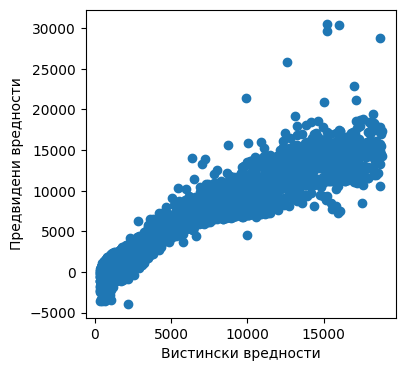

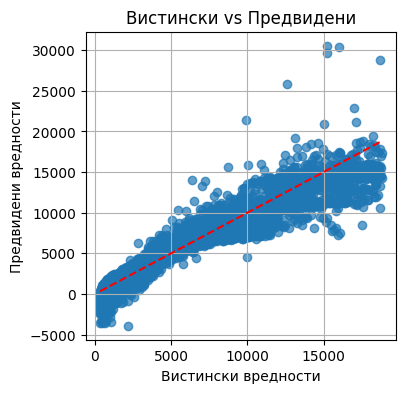

In [27]:
reg = RidgeCV(alphas=[0.001, 0.01, 0.03, 0.1, 1.0, 10.0]).fit(X_train, y_train)
print("Коефициенти W: ", reg.coef_)
print("Пресек W0: ", reg.intercept_)

print(f"Optimal alpha for RidgeCV: {reg.alpha_}")

y_pred = reg.predict(X_test)
print("Средна квадратна грешка:", mean_squared_error(y_test, y_pred))
print("Средна апсолутна грешка:", mean_absolute_error(y_test, y_pred))
print("Корен на средна квадратна грешка:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-квадрат: ", r2_score(y_test,y_pred))

plt.figure(figsize=(4, 4))
plt.scatter(y_test,y_pred)
plt.xlabel("Вистински вредности")
plt.ylabel("Предвидени вредности")
plt.show()

plt.figure(figsize=(4, 4))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Вистински вредности")
plt.ylabel("Предвидени вредности")
plt.title("Вистински vs Предвидени")
plt.grid(True)
plt.show()

Коефициенти W:  [ 5.42112570e+04  4.32658164e+02 -2.86367457e+03 -1.37971044e+03
 -1.10765646e+04  0.00000000e+00 -4.54521188e+01 -2.12540656e+02
 -2.79520069e+02 -4.94168414e+02 -9.96726943e+02 -1.47404554e+03
 -2.36523101e+03  5.44471603e+03  3.76946809e+03  2.78768984e+03
  4.66928316e+03  4.35402532e+03  5.10444549e+03  5.04731681e+03]
Пресек W0:  1202.3414336010464
Optimal alpha for LassoCV: 0.03
Средна квадратна грешка: 1294241.0886244401
Средна апсолутна грешка: 737.8175002488342
Корен на средна квадратна грешка: 1137.6471722922006
R-квадрат:  0.918584913808547


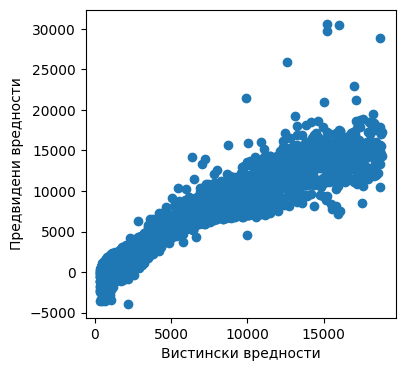

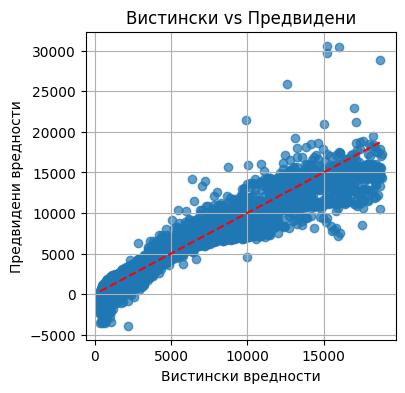

In [28]:
reg = LassoCV(alphas=[0.001, 0.01, 0.03, 0.1, 1.0, 10.0]).fit(X_train, y_train)
print("Коефициенти W: ", reg.coef_)
print("Пресек W0: ", reg.intercept_)

print(f"Optimal alpha for LassoCV: {reg.alpha_}")

y_pred = reg.predict(X_test)
print("Средна квадратна грешка:", mean_squared_error(y_test, y_pred))
print("Средна апсолутна грешка:", mean_absolute_error(y_test, y_pred))
print("Корен на средна квадратна грешка:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-квадрат: ", r2_score(y_test,y_pred))

plt.figure(figsize=(4, 4))
plt.scatter(y_test,y_pred)
plt.xlabel("Вистински вредности")
plt.ylabel("Предвидени вредности")
plt.show()

plt.figure(figsize=(4, 4))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Вистински вредности")
plt.ylabel("Предвидени вредности")
plt.title("Вистински vs Предвидени")
plt.grid(True)
plt.show()

Коефициенти W:  [4949.45132485 -116.15612608  -36.45546712  211.3855697  4934.80541644
  896.95566374 1018.8942728  -369.58652708   12.62818554  195.91127083
  322.48801995  509.81401611  315.73179286 -115.66994302   45.41760978
  475.91514554   96.56855661  145.80087268 -342.15928889  -29.90372103]
Пресек W0:  331.55166973997666
Средна квадратна грешка: 9211558.769335149
Средна апсолутна грешка: 2198.1354795333796
Корен на средна квадратна грешка: 3035.054986212795
R-квадрат:  0.4205408422320015


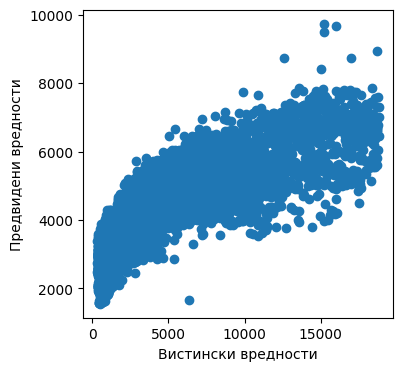

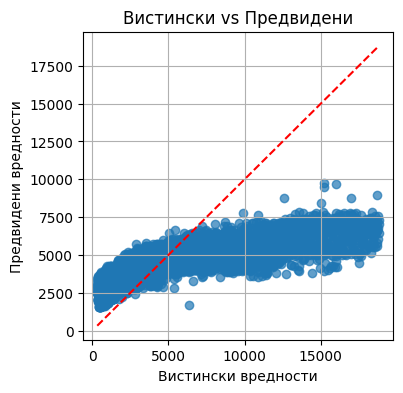

In [29]:
reg = ElasticNet(alpha=0.1, l1_ratio=0.5).fit(X_train, y_train)
print("Коефициенти W: ", reg.coef_)
print("Пресек W0: ", reg.intercept_)

y_pred = reg.predict(X_test)
print("Средна квадратна грешка:", mean_squared_error(y_test, y_pred))
print("Средна апсолутна грешка:", mean_absolute_error(y_test, y_pred))
print("Корен на средна квадратна грешка:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-квадрат: ", r2_score(y_test,y_pred))

plt.figure(figsize=(4, 4))
plt.scatter(y_test,y_pred)
plt.xlabel("Вистински вредности")
plt.ylabel("Предвидени вредности")
plt.show()

plt.figure(figsize=(4, 4))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Вистински вредности")
plt.ylabel("Предвидени вредности")
plt.title("Вистински vs Предвидени")
plt.grid(True)
plt.show()

Коефициенти W:  [ 54329.0955443     429.15743961  -2847.57377888  -1414.75496049
 -11083.79216249    501.95950945   -964.76309564   -214.05731553
   -280.95774418   -495.78230333   -998.64040104  -1476.413123
  -2368.03842855   5460.93853555   3786.02281307   2803.76013363
   4685.8650082    4370.36695773   5120.36879743   5063.35920194]
Пресек W0:  1234.3216803591854
Средна квадратна грешка: 1294174.7389826546
Средна апсолутна грешка: 737.6103069163626
[1145.99973949 1145.91515047 1146.67796316 ... 1144.95395229 1146.87693192
 1147.16169146]
10788
Корен на средна квадратна грешка: 1137.6180110136506
R-квадрат:  0.9185890875763653


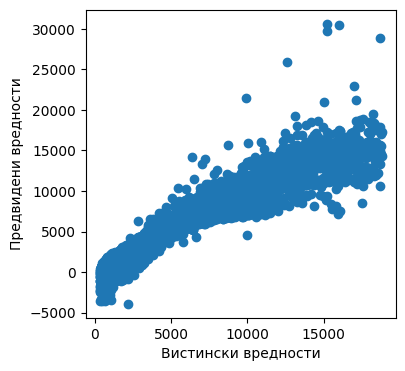

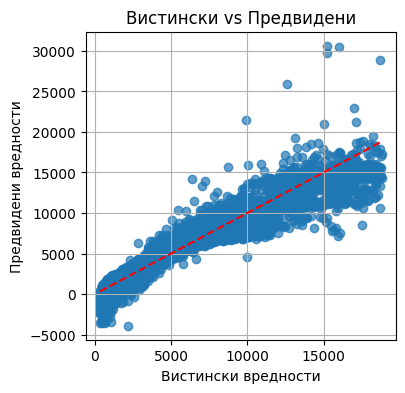

In [30]:
reg = BayesianRidge().fit(X_train, y_train)
print("Коефициенти W: ", reg.coef_)
print("Пресек W0: ", reg.intercept_)

y_pred, y_std = reg.predict(X_test, return_std = True)
print("Средна квадратна грешка:", mean_squared_error(y_test, y_pred))
print("Средна апсолутна грешка:", mean_absolute_error(y_test, y_pred))
print(y_std)
print(len(y_std))
print("Корен на средна квадратна грешка:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-квадрат: ", r2_score(y_test, y_pred))

plt.figure(figsize=(4, 4))
plt.scatter(y_test,y_pred)
plt.xlabel("Вистински вредности")
plt.ylabel("Предвидени вредности")
plt.show()

plt.figure(figsize=(4, 4))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Вистински вредности")
plt.ylabel("Предвидени вредности")
plt.title("Вистински vs Предвидени")
plt.grid(True)
plt.show()



---



In [31]:
X = df.drop(columns=["price", "x", "y", "z"])
y = df["price"]

In [32]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Коефициенти W:  [42826.41400812   437.65998073 -1263.83511074 -1361.35998922
  -212.96858826  -310.37905506  -520.13170312  -992.38201675
 -1446.85855098 -2320.84246578  5531.19067555  3701.11011531
  2733.50979575  4642.91906395  4323.21028501  5186.4759943
  5081.37824265]
Пресек W0:  -4110.214641683166
Средна квадратна грешка: 1351294.8183576833
Средна апсолутна грешка: 803.6129482132582
Корен на средна квадратна грешка: 1162.4520714238859
R-квадрат:  0.9149959114467747


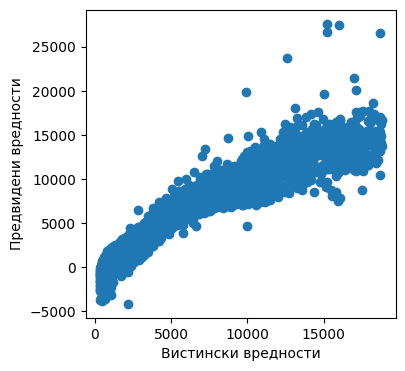

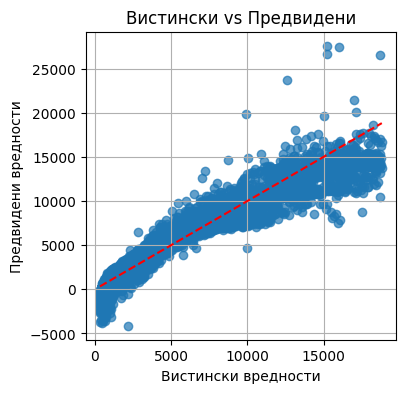

In [33]:
reg = LinearRegression().fit(X_train, y_train)
print("Коефициенти W: ", reg.coef_)
print("Пресек W0: ", reg.intercept_)

y_pred = reg.predict(X_test)
print("Средна квадратна грешка:", mean_squared_error(y_test, y_pred))
print("Средна апсолутна грешка:", mean_absolute_error(y_test, y_pred))
print("Корен на средна квадратна грешка:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-квадрат: ", r2_score(y_test,y_pred))

plt.figure(figsize=(4, 4))
plt.scatter(y_test,y_pred)
plt.xlabel("Вистински вредности")
plt.ylabel("Предвидени вредности")
plt.show()

plt.figure(figsize=(4, 4))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Вистински вредности")
plt.ylabel("Предвидени вредности")
plt.title("Вистински vs Предвидени")
plt.grid(True)
plt.show()

Коефициенти W:  [42821.95722733   437.80138582 -1262.85407786 -1359.25798383
  -212.91839988  -310.24692295  -519.93450947  -992.11371506
 -1446.4762143  -2320.34805926  5528.82717631  3699.15941929
  2731.76394187  4640.82996609  4321.18340612  5184.17999397
  5079.19399165]
Пресек W0:  -4109.050333266582
Optimal alpha for RidgeCV: 0.03
Средна квадратна грешка: 1351273.665512256
Средна апсолутна грешка: 803.5452811508856
Корен на средна квадратна грешка: 1162.4429730151307
R-квадрат:  0.914997242080417


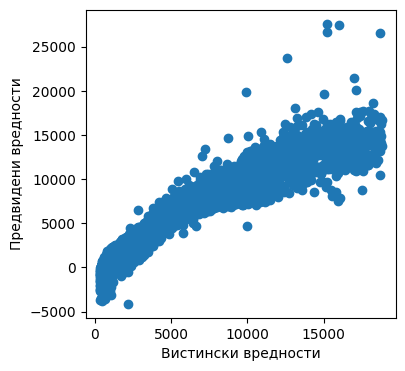

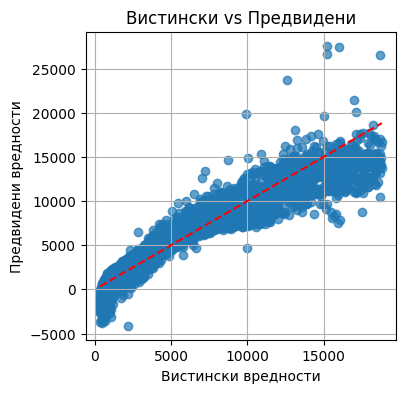

In [34]:
reg = RidgeCV(alphas=[0.001, 0.01, 0.03, 0.1, 1.0, 10.0], cv=5).fit(X_train, y_train)
print("Коефициенти W: ", reg.coef_)
print("Пресек W0: ", reg.intercept_)

print(f"Optimal alpha for RidgeCV: {reg.alpha_}")

y_pred = reg.predict(X_test)
print("Средна квадратна грешка:", mean_squared_error(y_test, y_pred))
print("Средна апсолутна грешка:", mean_absolute_error(y_test, y_pred))
print("Корен на средна квадратна грешка:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-квадрат: ", r2_score(y_test,y_pred))

plt.figure(figsize=(4, 4))
plt.scatter(y_test,y_pred)
plt.xlabel("Вистински вредности")
plt.ylabel("Предвидени вредности")
plt.show()

plt.figure(figsize=(4, 4))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Вистински вредности")
plt.ylabel("Предвидени вредности")
plt.title("Вистински vs Предвидени")
plt.grid(True)
plt.show()

Коефициенти W:  [42826.08968724   437.77164184 -1262.79092926 -1360.19661962
  -212.91523646  -310.32093191  -520.07069051  -992.32035653
 -1446.78607041 -2320.75667515  5530.61909032  3700.57761427
  2732.98939462  4642.3762782   4322.67319876  5185.91556794
  5080.82929086]
Пресек W0:  -4110.645956233836
Optimal alpha for LassoCV: 0.001
Средна квадратна грешка: 1351292.2879416265
Средна апсолутна грешка: 803.6047266199839
Корен на средна квадратна грешка: 1162.450983027511
R-квадрат:  0.9149960706242597


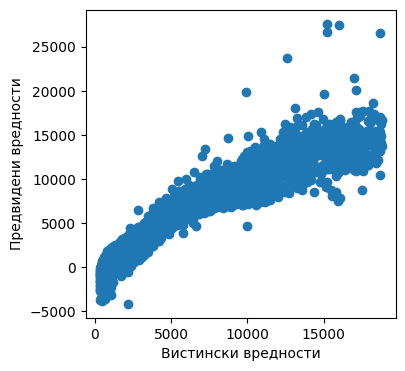

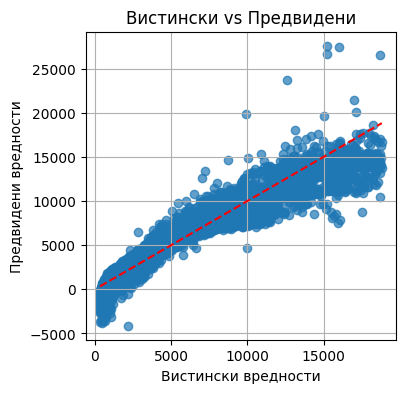

In [35]:
reg = LassoCV(alphas=[0.001, 0.01, 0.03, 0.1, 1.0, 10.0]).fit(X_train, y_train)
print("Коефициенти W: ", reg.coef_)
print("Пресек W0: ", reg.intercept_)

print(f"Optimal alpha for LassoCV: {reg.alpha_}")

y_pred = reg.predict(X_test)
print("Средна квадратна грешка:", mean_squared_error(y_test, y_pred))
print("Средна апсолутна грешка:", mean_absolute_error(y_test, y_pred))
print("Корен на средна квадратна грешка:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-квадрат: ", r2_score(y_test,y_pred))

plt.figure(figsize=(4, 4))
plt.scatter(y_test,y_pred)
plt.xlabel("Вистински вредности")
plt.ylabel("Предвидени вредности")
plt.show()

plt.figure(figsize=(4, 4))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Вистински вредности")
plt.ylabel("Предвидени вредности")
plt.title("Вистински vs Предвидени")
plt.grid(True)
plt.show()

Коефициенти W:  [ 5.72960536e+03 -2.02712093e+02 -5.55892107e+01  2.62997807e+02
 -4.60483556e+02 -1.81694295e+00  2.19709983e+02  4.16679193e+02
  6.59360932e+02  4.82156780e+02 -2.32270453e+02  1.22275173e+02
  7.13656294e+02  6.34874857e+01  1.48487952e+02 -5.09868809e+02
 -1.43688672e+02]
Пресек W0:  3075.2293442760233
Средна квадратна грешка: 11604177.839398121
Средна апсолутна грешка: 2515.615598218436
Корен на средна квадратна грешка: 3406.49054591351
R-квадрат:  0.27003156731821754


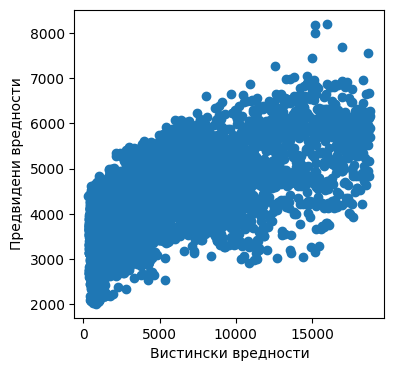

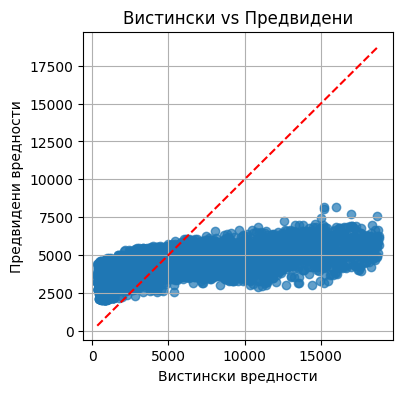

In [36]:
reg = ElasticNet(alpha=0.1, l1_ratio=0.5).fit(X_train, y_train)
print("Коефициенти W: ", reg.coef_)
print("Пресек W0: ", reg.intercept_)

y_pred = reg.predict(X_test)
print("Средна квадратна грешка:", mean_squared_error(y_test, y_pred))
print("Средна апсолутна грешка:", mean_absolute_error(y_test, y_pred))
print("Корен на средна квадратна грешка:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-квадрат: ", r2_score(y_test,y_pred))

plt.figure(figsize=(4, 4))
plt.scatter(y_test,y_pred)
plt.xlabel("Вистински вредности")
plt.ylabel("Предвидени вредности")
plt.show()

plt.figure(figsize=(4, 4))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Вистински вредности")
plt.ylabel("Предвидени вредности")
plt.title("Вистински vs Предвидени")
plt.grid(True)
plt.show()

Коефициенти W:  [42824.7102584    437.71406898 -1263.45988087 -1360.55612959
  -212.94940167  -310.32854303  -520.05631933  -992.27945116
 -1446.7123918  -2320.65346465  5530.28702547  3700.3642764
  2732.84226367  4642.12031678  4322.43532285  5185.5981505
  5080.54311966]
Пресек W0:  -4109.7696354791005
Средна квадратна грешка: 1351286.6881352295
Средна апсолутна грешка: 803.5870794756045
[1167.23943179 1165.8743623  1166.99487578 ... 1165.99080462 1166.93113977
 1167.31795971]
10788
Корен на средна квадратна грешка: 1162.4485744045753
R-квадрат:  0.914996422883761


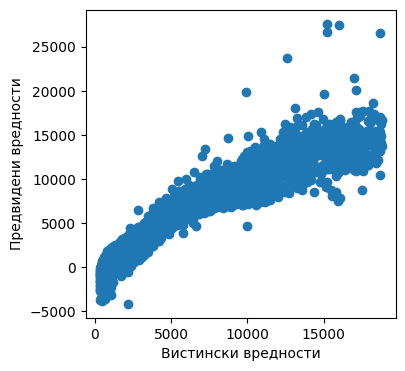

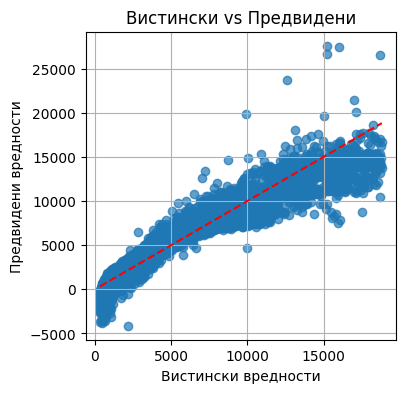

In [37]:
reg = BayesianRidge().fit(X_train, y_train)
print("Коефициенти W: ", reg.coef_)
print("Пресек W0: ", reg.intercept_)

y_pred, y_std = reg.predict(X_test, return_std = True)
print("Средна квадратна грешка:", mean_squared_error(y_test, y_pred))
print("Средна апсолутна грешка:", mean_absolute_error(y_test, y_pred))
print(y_std)
print(len(y_std))
print("Корен на средна квадратна грешка:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-квадрат: ", r2_score(y_test, y_pred))

plt.figure(figsize=(4, 4))
plt.scatter(y_test,y_pred)
plt.xlabel("Вистински вредности")
plt.ylabel("Предвидени вредности")
plt.show()

plt.figure(figsize=(4, 4))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Вистински вредности")
plt.ylabel("Предвидени вредности")
plt.title("Вистински vs Предвидени")
plt.grid(True)
plt.show()